In [1]:
import pandas as pd
import regex as re

In [2]:
df_model = pd.read_csv("df_model_2.csv")

In [3]:
df_model

,address,postal_code,listed_price,living_area,number_of_rooms,agent,url,Type_x,Type_y,transaction_price_com,...,number_of_rooms_detail,number_of_bath_rooms,bathroom_facilities,number_of_stories,located_at,ownership_situation,Transaction Price Per m2_com,Bidding %_com,neighbourhood_new,energy_label_new
0,'s-Gravesandeplein 17 I,1091 BB Amsterdam,"€ 595,000 k.k.",78 m²,3 rooms,SEM makelaars,https://www.funda.nl/en/koop/verkocht/amsterda...,NaN,NaN,NaN,...,3 rooms (2 bedrooms),1 bathroom and 1 separate toilet,Shower and toilet,1 story,2nd floor,Municipal ownership encumbered with long-term ...,NaN,NaN,Oosterparkbuurt,E
1,'s-Gravesandeplein 28,1091 BC Amsterdam,"€ 425,000 k.k.",86 m²,2 rooms,Mendes Makelaardij,https://www.funda.nl/en/koop/verkocht/amsterda...,upstairs apartment,upstairs apartment,425000.0,...,2 rooms (1 bedroom),1 story,4th floor,NaN,NaN,Municipal long-term lease,4942.0,0.0,Oosterparkbuurt,C
2,'s-Gravesandeplein 46,1091 BC Amsterdam,"€ 475,000 k.k.",74 m²,3 rooms,KNAP Makelaardij Certified Expat Broker,https://www.funda.nl/en/koop/verkocht/amsterda...,NaN,NaN,NaN,...,3 rooms (2 bedrooms),1 separate toilet,1 story,1st floor,Mechanical ventilation and TV via cable,Municipal ownership encumbered with long-term ...,NaN,NaN,Oosterparkbuurt,C
3,'s-Gravesandestraat 46,1091 DE Amsterdam,"€ 435,000 k.k.",71 m²,4 rooms,Makelaarsland,https://www.funda.nl/en/koop/verkocht/amsterda...,NaN,NaN,NaN,...,4 rooms (2 bedrooms),1 bathroom and 1 separate toilet,Bath and shower,1 story,1st floor,Long-term lease,NaN,NaN,Oosterparkbuurt,A
4,1e Kekerstraat 117,1104 VA Amsterdam,"€ 300,000 k.k.",91 m²,3 rooms,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterda...,apartment,apartment,335000.0,...,3 rooms (2 bedrooms),1 story,3rd floor,"Elevator, mechanical ventilation and TV via cable",NaN,Municipal ownership encumbered with long-term ...,3682.0,11.7,"Bijlmer Oost (E,G,K)",A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,Zwanenplein 59,1021 CJ Amsterdam,"€ 300,000 k.k.",46 m²,3 rooms,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterda...,upstairs apartment,upstairs apartment,325000.0,...,3 rooms (2 bedrooms),1 bathroom and 1 separate toilet,Shower and toilet,1 story,1st floor,Municipal ownership encumbered with long-term ...,7066.0,8.4,IJplein/Vogelbuurt,A
7239,Zwanenplein 69,1021 CK Amsterdam,"€ 465,000 k.k.",73 m²,4 rooms,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterda...,NaN,NaN,NaN,...,4 rooms (3 bedrooms),1 bathroom,Shower and toilet,2 stories,2nd floor,Municipal ownership encumbered with long-term ...,NaN,NaN,IJplein/Vogelbuurt,A
7240,Zwanenplein 7,1021 CG Amsterdam,"€ 475,000 k.k.",93 m²,5 rooms,Fransen & Kroes Makelaars,https://www.funda.nl/en/koop/verkocht/amsterda...,upstairs apartment,upstairs apartment,540000.0,...,5 rooms (4 bedrooms),1 bathroom and 1 separate toilet,Bath and shower,3 stories,1st floor,Ownership encumbered with long-term leaset (en...,5807.0,13.7,IJplein/Vogelbuurt,C
7241,Zwanenplein 81,1021 CK Amsterdam,"€ 415,000 k.k.",65 m²,3 rooms,Thoma Post Makelaars Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterda...,first floor apartment,first floor apartment,531642.0,...,3 rooms (2 bedrooms),1 bathroom,Bath,1 story,Ground floor,See deed,8180.0,28.2,IJplein/Vogelbuurt,not_available


In [4]:
def listed_price(a):
    return re.sub(r"k.k.", "", a)

In [5]:
def listed_price_2(a):
    return re.sub(r"€", "", a)

In [6]:
def listed_price_3(a):
    return re.sub(r"v.o.n.", "", a)

In [7]:
def listed_price_4(a):
    return re.sub(r",", "", a)

In [8]:
df_model['listed_price'] = df_model['listed_price'].apply(listed_price)
df_model['listed_price'] = df_model['listed_price'].apply(listed_price_2)
df_model['listed_price'] = df_model['listed_price'].apply(listed_price_3)
df_model['listed_price'] = df_model['listed_price'].apply(listed_price_4).str.strip()


In [9]:
df_model['listed_price'] = pd.to_numeric(df_model['listed_price'],errors='coerce')

# pd.to_numeric(df_model['listed_price'],errors='coerce')

In [10]:
df_model['listed_price'].value_counts()

325000.0    309
350000.0    305
375000.0    286
450000.0    235
300000.0    230
           ... 
169000.0      1
624000.0      1
647500.0      1
307500.0      1
800405.0      1
Name: listed_price, Length: 593, dtype: int64

In [11]:
df_model.isna().sum()

address                            0
postal_code                        0
listed_price                      31
living_area                        0
number_of_rooms                    0
agent                              0
url                                4
Type_x                          4208
Type_y                          3539
transaction_price_com           3381
listed_since                       0
date_of_sale                       0
year_of_construction               2
number_of_rooms_detail             2
number_of_bath_rooms               2
bathroom_facilities              196
number_of_stories                374
located_at                       860
ownership_situation              375
Transaction Price Per m2_com    3381
Bidding %_com                   3365
neighbourhood_new                  1
energy_label_new                   2
dtype: int64

In [13]:
df_model

,address,postal_code,listed_price,living_area,number_of_rooms,agent,url,Type_x,Type_y,transaction_price_com,...,number_of_rooms_detail,number_of_bath_rooms,bathroom_facilities,number_of_stories,located_at,ownership_situation,Transaction Price Per m2_com,Bidding %_com,neighbourhood_new,energy_label_new
0,'s-Gravesandeplein 17 I,1091 BB Amsterdam,595000.0,78 m²,3 rooms,SEM makelaars,https://www.funda.nl/en/koop/verkocht/amsterda...,NaN,NaN,NaN,...,3 rooms (2 bedrooms),1 bathroom and 1 separate toilet,Shower and toilet,1 story,2nd floor,Municipal ownership encumbered with long-term ...,NaN,NaN,Oosterparkbuurt,E
1,'s-Gravesandeplein 28,1091 BC Amsterdam,425000.0,86 m²,2 rooms,Mendes Makelaardij,https://www.funda.nl/en/koop/verkocht/amsterda...,upstairs apartment,upstairs apartment,425000.0,...,2 rooms (1 bedroom),1 story,4th floor,NaN,NaN,Municipal long-term lease,4942.0,0.0,Oosterparkbuurt,C
2,'s-Gravesandeplein 46,1091 BC Amsterdam,475000.0,74 m²,3 rooms,KNAP Makelaardij Certified Expat Broker,https://www.funda.nl/en/koop/verkocht/amsterda...,NaN,NaN,NaN,...,3 rooms (2 bedrooms),1 separate toilet,1 story,1st floor,Mechanical ventilation and TV via cable,Municipal ownership encumbered with long-term ...,NaN,NaN,Oosterparkbuurt,C
3,'s-Gravesandestraat 46,1091 DE Amsterdam,435000.0,71 m²,4 rooms,Makelaarsland,https://www.funda.nl/en/koop/verkocht/amsterda...,NaN,NaN,NaN,...,4 rooms (2 bedrooms),1 bathroom and 1 separate toilet,Bath and shower,1 story,1st floor,Long-term lease,NaN,NaN,Oosterparkbuurt,A
4,1e Kekerstraat 117,1104 VA Amsterdam,300000.0,91 m²,3 rooms,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterda...,apartment,apartment,335000.0,...,3 rooms (2 bedrooms),1 story,3rd floor,"Elevator, mechanical ventilation and TV via cable",NaN,Municipal ownership encumbered with long-term ...,3682.0,11.7,"Bijlmer Oost (E,G,K)",A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,Zwanenplein 59,1021 CJ Amsterdam,300000.0,46 m²,3 rooms,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterda...,upstairs apartment,upstairs apartment,325000.0,...,3 rooms (2 bedrooms),1 bathroom and 1 separate toilet,Shower and toilet,1 story,1st floor,Municipal ownership encumbered with long-term ...,7066.0,8.4,IJplein/Vogelbuurt,A
7239,Zwanenplein 69,1021 CK Amsterdam,465000.0,73 m²,4 rooms,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterda...,NaN,NaN,NaN,...,4 rooms (3 bedrooms),1 bathroom,Shower and toilet,2 stories,2nd floor,Municipal ownership encumbered with long-term ...,NaN,NaN,IJplein/Vogelbuurt,A
7240,Zwanenplein 7,1021 CG Amsterdam,475000.0,93 m²,5 rooms,Fransen & Kroes Makelaars,https://www.funda.nl/en/koop/verkocht/amsterda...,upstairs apartment,upstairs apartment,540000.0,...,5 rooms (4 bedrooms),1 bathroom and 1 separate toilet,Bath and shower,3 stories,1st floor,Ownership encumbered with long-term leaset (en...,5807.0,13.7,IJplein/Vogelbuurt,C
7241,Zwanenplein 81,1021 CK Amsterdam,415000.0,65 m²,3 rooms,Thoma Post Makelaars Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterda...,first floor apartment,first floor apartment,531642.0,...,3 rooms (2 bedrooms),1 bathroom,Bath,1 story,Ground floor,See deed,8180.0,28.2,IJplein/Vogelbuurt,not_available


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7243 entries, 0 to 7242
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   address                       7243 non-null   object 
 1   postal_code                   7243 non-null   object 
 2   listed_price                  7212 non-null   float64
 3   living_area                   7243 non-null   object 
 4   number_of_rooms               7243 non-null   object 
 5   agent                         7243 non-null   object 
 6   url                           7239 non-null   object 
 7   Type_x                        3035 non-null   object 
 8   Type_y                        3704 non-null   object 
 9   transaction_price_com         3862 non-null   float64
 10  listed_since                  7243 non-null   object 
 11  date_of_sale                  7243 non-null   object 
 12  year_of_construction          7241 non-null   object 
 13  num

In [17]:
df_model['ownership_situation'].value_counts()[0:50]

Full ownership                                                                                     2379
Municipal ownership encumbered with long-term leaset                                                816
Municipal long-term lease                                                                           674
Long-term lease                                                                                     205
Ownership encumbered with long-term leaset                                                          113
See deed                                                                                             31
Part of parcel                                                                                       20
Municipal long-term lease (end date of long-term lease: 15-10-2037)                                  16
Municipal long-term lease (end date of long-term lease:  31-12-2054)                                 11
Municipal ownership encumbered with long-term leaset (end date o

In [18]:
mask = (df_model['ownership_situation'] == df_model['address'])
df_model['ownership_situation'][mask] = 'unknown'

# When scraping the features with one part of the code, I included the default value to the address if the selector was not found



<ipython-input-18-bd30b46ef69d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['ownership_situation'][mask] = 'unknown'


In [19]:
df_model['ownership_situation_new'] = df_model['ownership_situation'].str.replace('\(.*\)',"").str.strip()

<ipython-input-19-c58cc401c0e7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_model['ownership_situation_new'] = df_model['ownership_situation'].str.replace('\(.*\)',"").str.strip()


In [20]:
df_model['ownership_situation_new']

0       Municipal ownership encumbered with long-term ...
1                               Municipal long-term lease
2       Municipal ownership encumbered with long-term ...
3                                         Long-term lease
4       Municipal ownership encumbered with long-term ...
                              ...                        
7238    Municipal ownership encumbered with long-term ...
7239    Municipal ownership encumbered with long-term ...
7240           Ownership encumbered with long-term leaset
7241                                             See deed
7242                            Municipal long-term lease
Name: ownership_situation_new, Length: 7243, dtype: object

In [21]:
df_model['ownership_situation_new'].value_counts()

Full ownership                                                                          2379
Municipal ownership encumbered with long-term leaset                                    2060
Municipal long-term lease                                                               1697
Long-term lease                                                                          271
Ownership encumbered with long-term leaset                                               230
unknown                                                                                  152
See deed                                                                                  31
Part of parcel                                                                            20
Private ownership encumbered with long-term leaset                                         8
Private long-term lease                                                                    7
Right of membership                                                   

In [22]:
import numpy as np

In [23]:
# To replace the "address" included in the other columnns (due to website inconsistency) with unknown
# Change column value based on the value of another column
mask = (df_model['bathroom_facilities'] == df_model['address'])
df_model['bathroom_facilities'][mask] = 'unknown'

<ipython-input-23-51e3e38c447a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['bathroom_facilities'][mask] = 'unknown'


In [24]:
#15

df_model['bathroom_facilities'].value_counts()[0:20]

Shower                           1358
Shower and toilet                1309
1 story                           701
Bath and shower                   687
Bath                              583
Bath, shower and toilet           474
Toilet                            422
Bath and toilet                   405
2 stories                         101
2nd floor                          84
unknown                            80
Bath, 2 showers and toilet         75
3rd floor                          67
1st floor                          67
Bath, 2 showers and 2 toilets      59
Ground floor                       56
4th floor                          42
Bath, shower and 2 toilets         40
2 showers and 2 toilets            25
Bath and 2 showers                 25
Name: bathroom_facilities, dtype: int64

In [25]:
12#

mask = (df_model['bathroom_facilities'] == df_model['address'])
df_model['bathroom_facilities'][mask] = 'unknown'

<ipython-input-25-b6cc1fbfe097>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['bathroom_facilities'][mask] = 'unknown'


In [28]:
df_model.iloc[:, 12].value_counts()

# df.iloc[3:5, :]

Before 1906    361
1906-1930      289
2021           235
1930           180
1934           142
              ... 
1713             1
1825             1
1869             1
1785             1
1652             1
Name: year_of_construction, Length: 228, dtype: int64

In [30]:
mask = (df_model.iloc[:, 12] == df_model['address'])
print(mask.value_counts())

False    7242
True        1
dtype: int64


In [31]:
df_model.iloc[:, 12][mask] = 'unknown'

<ipython-input-31-51d5e2ea1542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.iloc[:, 12][mask] = 'unknown'


In [32]:
df_model[(df_model.iloc[:, 12] == 'unknown')]

,address,postal_code,listed_price,living_area,number_of_rooms,agent,url,Type_x,Type_y,transaction_price_com,...,number_of_bath_rooms,bathroom_facilities,number_of_stories,located_at,ownership_situation,Transaction Price Per m2_com,Bidding %_com,neighbourhood_new,energy_label_new,ownership_situation_new
1066,Ceintuurbaan 195 II,1074 CV Amsterdam,450000.0,64 m²,3 rooms,Visch & van Zeggelaar Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterda...,NaN,unknown,475000.0,...,Ceintuurbaan 195 II,unknown,Ceintuurbaan 195 II,Ceintuurbaan 195 II,unknown,7422.0,5.6,Oude Pijp,C,unknown


In [33]:
df_model.iloc[:, 12].value_counts()

# find formula to group these

Before 1906    361
1906-1930      289
2021           235
1930           180
1934           142
              ... 
1770             1
1602             1
1636             1
1713             1
1652             1
Name: year_of_construction, Length: 228, dtype: int64

In [34]:
df_model.iloc[:, 13].value_counts()

3 rooms (2 bedrooms)        2821
2 rooms (1 bedroom)         1561
4 rooms (3 bedrooms)        1222
4 rooms (2 bedrooms)         340
5 rooms (3 bedrooms)         243
5 rooms (4 bedrooms)         213
3 rooms (1 bedroom)          162
1 room (1 bedroom)           133
1 room                       113
6 rooms (4 bedrooms)          87
6 rooms (3 bedrooms)          42
5 rooms (2 bedrooms)          35
3 rooms                       34
6 rooms (5 bedrooms)          31
2 rooms                       30
7 rooms (5 bedrooms)          29
4 rooms                       19
7 rooms (4 bedrooms)          18
4 rooms (1 bedroom)           17
8 rooms (6 bedrooms)           9
2 rooms (2 bedrooms)           9
8 rooms (5 bedrooms)           8
7 rooms (3 bedrooms)           8
3 rooms (3 bedrooms)           7
8 rooms (4 bedrooms)           7
7 rooms (6 bedrooms)           5
9 rooms (4 bedrooms)           4
4 rooms (4 bedrooms)           4
5 rooms (1 bedroom)            4
9 rooms (6 bedrooms)           3
6 rooms (2

In [35]:
pd.set_option('max_colwidth', 150)

In [36]:
df_model[['url','address']][(df_model['number_of_rooms_detail'] == '20 rooms')]

# df_trimmed[['neighbourhood_new','neighbourhood']][(df_trimmed['neighbourhood_new'] == 'urg West')]

,url,address
5813,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41312142-stadhouderskade-140-141/,Stadhouderskade 140 -141


In [37]:
df_model['number_of_bedrooms'] = df_model.iloc[:, 13].str.split('(').str[1]

In [39]:
df_model['number_of_bedrooms'].unique()

array(['2 bedrooms)', '1 bedroom)', '3 bedrooms)', nan, '4 bedrooms)',
       '5 bedrooms)', '6 bedrooms)', '8 bedrooms)', '7 bedrooms)',
       '9 bedrooms)', '2 slaapkamers)'], dtype=object)

In [40]:
df_model['number_of_bedrooms'] = df_model['number_of_bedrooms'].str[0]

In [41]:
df_model['number_of_bedrooms'].unique()

array(['2', '1', '3', nan, '4', '5', '6', '8', '7', '9'], dtype=object)

In [42]:
df_model['number_of_bedrooms'] = pd.to_numeric(df_model['number_of_bedrooms'],errors='coerce')

In [43]:
df_model['number_of_bedrooms'].unique()

array([ 2.,  1.,  3., nan,  4.,  5.,  6.,  8.,  7.,  9.])

In [44]:
df_model['number_of_bath_rooms'].value_counts()

# majority is 1 bathroom → drop the column

1 bathroom and 1 separate toilet      3645
1 bathroom                            1894
1 story                                597
2 bathrooms and 1 separate toilet      330
1 separate toilet                      251
1 bathroom and 2 separate toilets      167
2 bathrooms and 2 separate toilets      98
2 bathrooms                             83
2 stories                               67
3 bathrooms and 1 separate toilet       21
2 separate toilets                      18
3 bathrooms and 2 separate toilets      14
3 stories                               12
4 stories                               10
3 bathrooms                              9
5 stories                                9
2 bathrooms and 3 separate toilets       5
10 stories                               2
1 badkamer en 1 apart toilet             1
3 bathrooms and 5 separate toilets       1
4 separate toilets                       1
Ceintuurbaan 195 II                      1
3 separate toilets                       1
3 bathrooms

In [45]:
df_model['number_of_stories'].value_counts()[:]

1 story                                                   3870
2 stories                                                 1244
3 stories                                                  269
2nd floor                                                  185
3rd floor                                                  157
                                                          ... 
Optical fibre, mechanical ventilation and sliding door       1
Bouwnummer (Bouwnr. 114)                                     1
Somerparc aan de Amstel (Bouwnr. 43)                         1
Mataramstraat 13 -B                                          1
Somerparc aan de Amstel (Bouwnr. 18)                         1
Name: number_of_stories, Length: 211, dtype: int64

In [46]:
mask = (df_model['number_of_stories'] == df_model['address'])
print(mask.value_counts())


False    7124
True      119
dtype: int64


In [47]:
df_model['number_of_stories'][mask] = 'unknown'

<ipython-input-47-d756aa27c690>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['number_of_stories'][mask] = 'unknown'


In [48]:
df_model['number_of_stories'].value_counts()[0:60]

1 story                                                                                             3870
2 stories                                                                                           1244
3 stories                                                                                            269
2nd floor                                                                                            185
3rd floor                                                                                            157
4 stories                                                                                            146
1st floor                                                                                            123
unknown                                                                                              119
Ground floor                                                                                         109
4th floor                                              

In [49]:
stories = df_model['number_of_stories'].str.contains('story|stories')

In [50]:
df_model['number_of_stories_new'] = np.where(stories, df_model['number_of_stories'], np.nan)

In [51]:
df_model['number_of_stories_new'].value_counts()

1 story       3870
2 stories     1244
3 stories      269
4 stories      146
5 stories       71
8 stories       19
6 stories       14
12 stories      11
13 stories      11
9 stories        9
10 stories       6
7 stories        5
18 stories       4
11 stories       4
14 stories       1
17 stories       1
15 stories       1
19 stories       1
Name: number_of_stories_new, dtype: int64

In [52]:
df_model['number_of_stories_new'] = df_model['number_of_stories_new'].str.replace('story|stories',"")

<ipython-input-52-3dd44993351e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_model['number_of_stories_new'] = df_model['number_of_stories_new'].str.replace('story|stories',"")


In [53]:
df_model['number_of_stories_new']

0        1 
1       NaN
2       NaN
3        1 
4       NaN
       ... 
7238     1 
7239     2 
7240     3 
7241     1 
7242    NaN
Name: number_of_stories_new, Length: 7243, dtype: object

In [54]:
df_model['number_of_stories_new'] = pd.to_numeric(df_model['number_of_stories_new'],errors='coerce')

In [55]:
df_model['number_of_stories_new']

0       1.0
1       NaN
2       NaN
3       1.0
4       NaN
       ... 
7238    1.0
7239    2.0
7240    3.0
7241    1.0
7242    NaN
Name: number_of_stories_new, Length: 7243, dtype: float64

In [52]:
# df1['State_code'] = df1.State.str.extract(r'\b(\w+)$', expand=True)
# 2
# print(df1)


In [54]:
# df_model_trimmed['number_of_stories_new'][stories] = df_model_trimmed['number_of_stories']

In [179]:
# data['year_of_construction'] = data['year_of_construction'].apply(lambda x: x.replace("unknown", "A"))

In [180]:
# formatting tools:

# figure(figsize=(20, 20), dpi=80)
# plt.xticks(rotation=45)
# plot_disc(categorical.drop(['customer'],axis=1))

In [181]:
# replace value with majority
# replace where below certain percentage

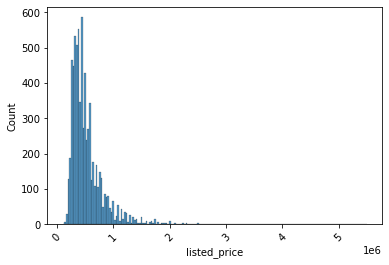

In [56]:
sns.histplot(df_model['listed_price'])
plt.xticks(rotation=45)

plt.show()

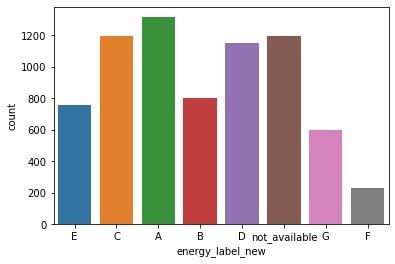

In [57]:
sns.countplot(x=df_model['energy_label_new'])
plt.show()

In [ ]:
def plot_disc(Dataframe):
#     for column in Dataframe.columns:
#         sns.histplot(x=Dataframe[column])
#         plt.show()
#     return None

# plot_disc(df_model_trimmed.drop(['address'],axis=1))

In [58]:
df_for_countplot = df_model.select_dtypes('object')

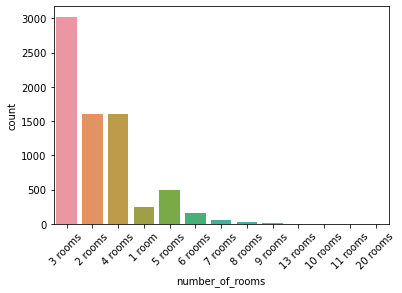

In [59]:
sns.countplot(x=df_model['number_of_rooms'])
plt.xticks(rotation=45)
plt.show()




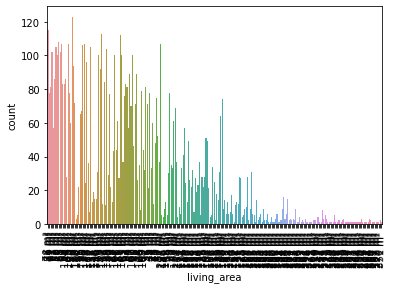

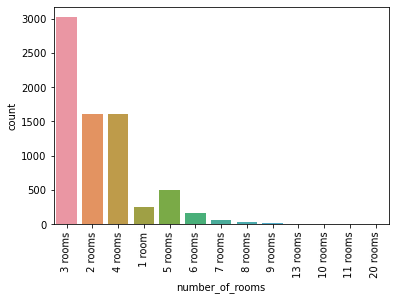

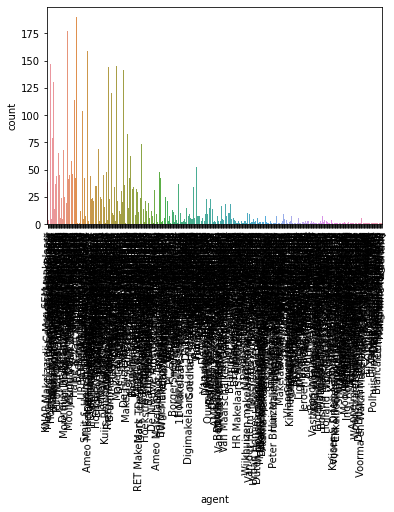

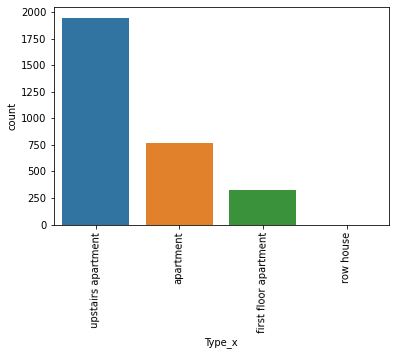

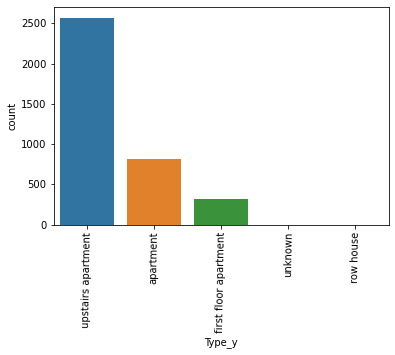

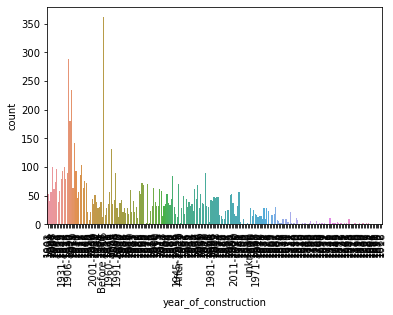

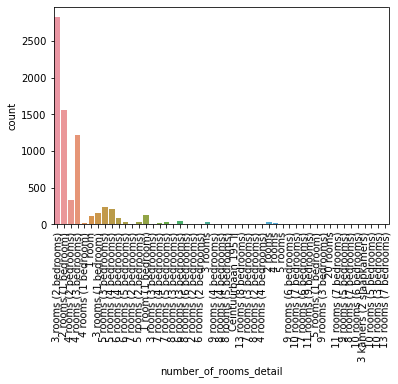

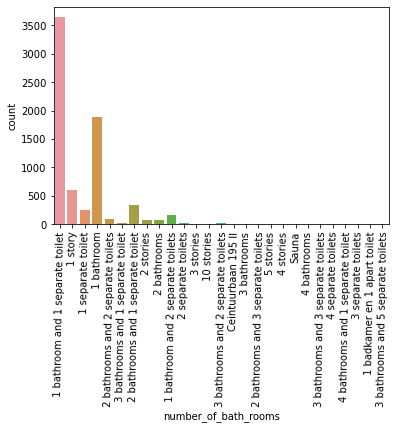

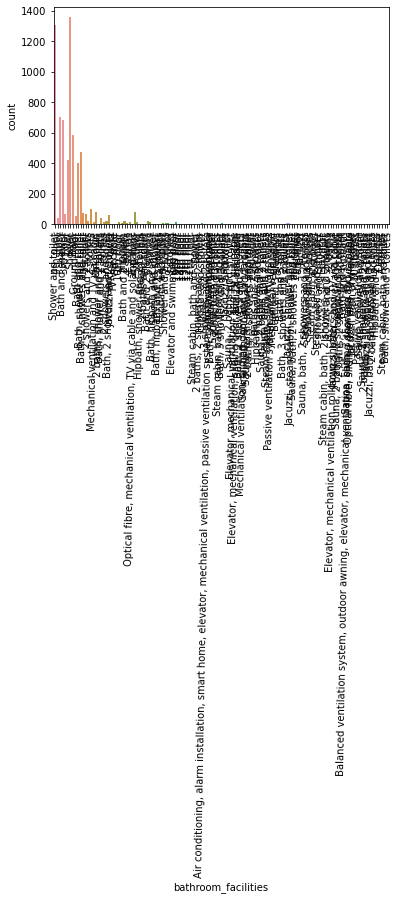

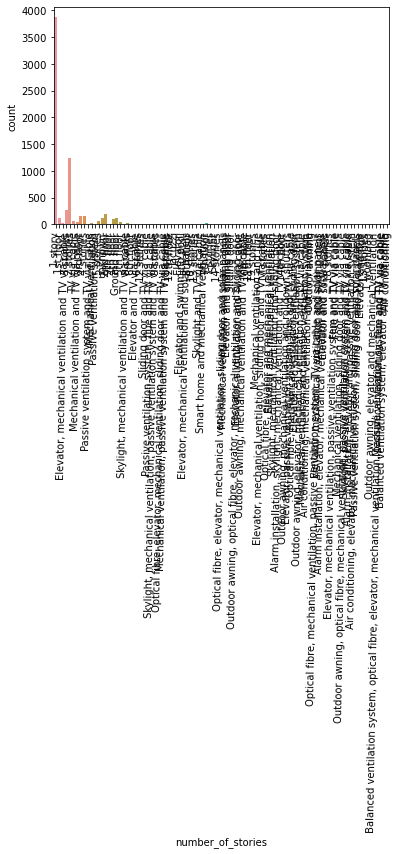

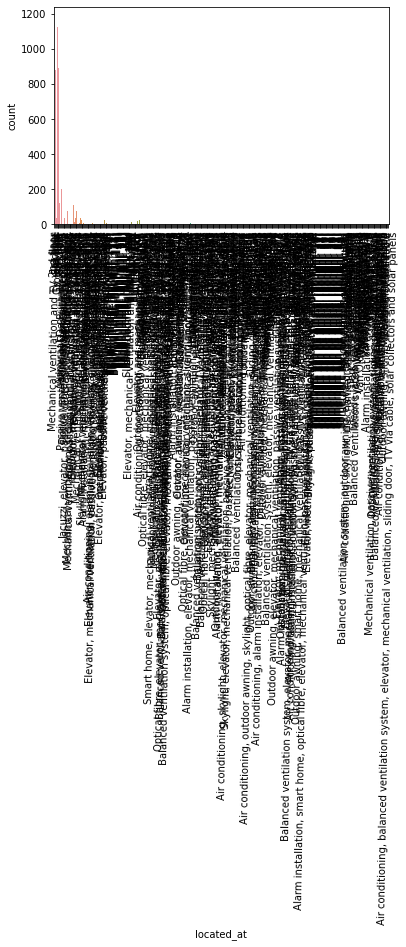

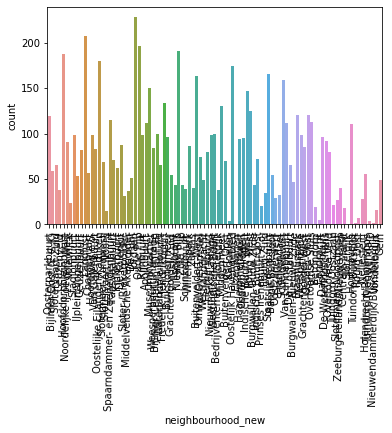

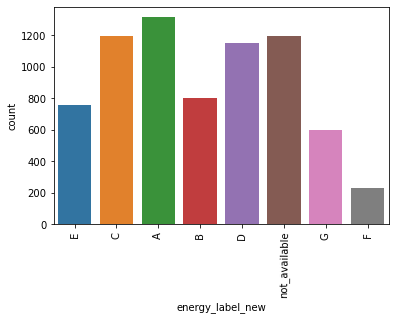

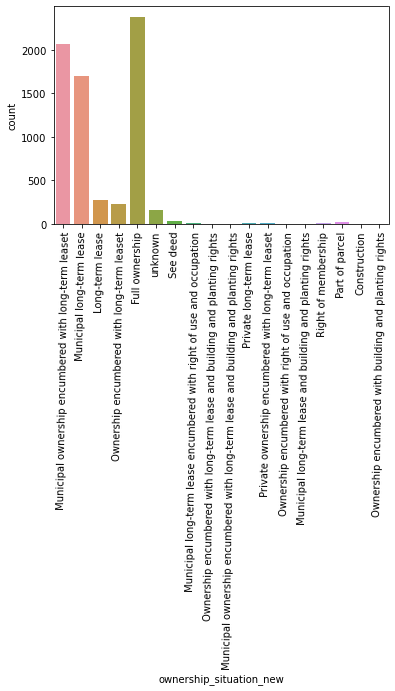

In [62]:
def plot_disc(Dataframe):
    for column in Dataframe.columns:
        sns.countplot(x=Dataframe[column])
        plt.xticks(rotation=89)
        plt.show()
    return None

plot_disc(df_for_countplot.drop(['address','postal_code','listed_since','date_of_sale','url','ownership_situation'],axis=1))
      
          
          

In [64]:
# sns.countplot(x=df_model['..'])
# plt.xticks(rotation=45)
# plt.show()

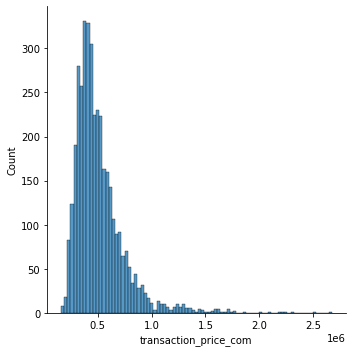

In [65]:
sns.displot (df_model['transaction_price_com'])
plt.show()

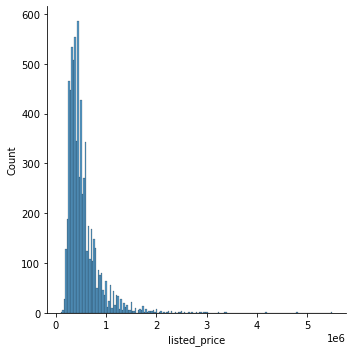

In [66]:
sns.displot (df_model['listed_price'])
plt.show()

In [ ]:
# def plot_disc(Dataframe):
#     for column in Dataframe.columns:
#         sns.countplot(x=Dataframe[column])
#         plt.show()
#     return None

# plot_disc(df_model)

# def plot_disc(Dataframe):
#     for column in Dataframe.columns:
#         sns.boxplot(y=Dataframe[column])
#         plt.show()
#     return None

# plot_disc(continuous_df)

# def plot_disc(Dataframe):
#     for column in Dataframe.columns:
#         sns.scatterplot(x=Dataframe[column],y =Dataframe['total_claim_amount'] )
#         plt.show()
#     return None

# plot_disc(continuous_df)

In [67]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7243 entries, 0 to 7242
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   address                       7243 non-null   object 
 1   postal_code                   7243 non-null   object 
 2   listed_price                  7212 non-null   float64
 3   living_area                   7243 non-null   object 
 4   number_of_rooms               7243 non-null   object 
 5   agent                         7243 non-null   object 
 6   url                           7239 non-null   object 
 7   Type_x                        3035 non-null   object 
 8   Type_y                        3704 non-null   object 
 9   transaction_price_com         3862 non-null   float64
 10  listed_since                  7243 non-null   object 
 11  date_of_sale                  7243 non-null   object 
 12  year_of_construction          7241 non-null   object 
 13  num

In [75]:
df_model['number_of_rooms'].value_counts(dropna=False)

3 rooms     3024
4 rooms     1603
2 rooms     1601
5 rooms      495
1 room       248
6 rooms      164
7 rooms       62
8 rooms       27
9 rooms       10
10 rooms       4
13 rooms       2
11 rooms       2
20 rooms       1
Name: number_of_rooms, dtype: int64

In [ ]:
# rooms = df_model['number_of_rooms'].str.contains('room|rooms')
# df_model['number_of_rooms'] = np.where(rooms, df_model['number_of_rooms'], np.nan)

In [76]:
df_model['number_of_rooms'] = df_model['number_of_rooms'].str.replace('room|rooms',"")

<ipython-input-76-f6b461f747f9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_model['number_of_rooms'] = df_model['number_of_rooms'].str.replace('room|rooms',"")


In [79]:
df_model['number_of_rooms'] = df_model['number_of_rooms'].str.replace('\s|s',"")

<ipython-input-79-1047397c7aec>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_model['number_of_rooms'] = df_model['number_of_rooms'].str.replace('\s|s',"")


In [80]:
df_model['number_of_rooms'].value_counts()

3     3024
4     1603
2     1601
5      495
1      248
6      164
7       62
8       27
9       10
10       4
13       2
11       2
20       1
Name: number_of_rooms, dtype: int64

In [68]:
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
listed_price,7212.0,535209.378258,326380.135309,100000.0,339000.00,450000.0,625000.0,5500000.0
transaction_price_com,3862.0,511738.407302,233191.110601,157500.0,365000.00,455000.0,600000.0,2675000.0
Transaction Price Per m2_com,3862.0,6954.031849,1732.179226,2572.0,5846.25,7156.5,8161.0,13352.0
Bidding %_com,3878.0,8.975142,8.199436,-45.8,2.90,8.7,14.6,93.6
number_of_bedrooms,7042.0,2.089463,0.906167,1.0,1.00,2.0,3.0,9.0
number_of_stories_new,5687.0,1.577633,1.378920,1.0,1.00,1.0,2.0,19.0


In [81]:
df_model['number_of_bedrooms'] = df_model['number_of_bedrooms'].fillna(0).astype(int)
df_model['number_of_stories_new'] = df_model['number_of_stories_new'].fillna(0).astype(int)
df_model['number_of_rooms'] = df_model['number_of_rooms'].fillna(0).astype(int)

In [82]:
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
listed_price,7212.0,535209.378258,326380.135309,100000.0,339000.00,450000.0,625000.0,5500000.0
number_of_rooms,7243.0,3.208753,1.185406,1.0,2.00,3.0,4.0,20.0
transaction_price_com,3862.0,511738.407302,233191.110601,157500.0,365000.00,455000.0,600000.0,2675000.0
Transaction Price Per m2_com,3862.0,6954.031849,1732.179226,2572.0,5846.25,7156.5,8161.0,13352.0
Bidding %_com,3878.0,8.975142,8.199436,-45.8,2.90,8.7,14.6,93.6
number_of_bedrooms,7243.0,2.031479,0.957162,0.0,1.00,2.0,3.0,9.0
number_of_stories_new,7243.0,1.238713,1.383029,0.0,1.00,1.0,2.0,19.0


In [ ]:
# Check df_model dataframe with main df

In [83]:
df_complete_final = pd.read_csv("df_complete_final.csv")

In [85]:
df_complete_final[0:50]

,Unnamed: 0,address,postal_code,listed_price,living_area,number_of_rooms,agent,href,address_3,url,...,year_of_construction,number_of_rooms_detail,number_of_bath_rooms,bathroom_facilities,number_of_stories,located_at,energy_label,ownership_situation,VVE_contribution,VVE_contribution
0,958,'s-Gravesandeplein 17 I,1091 BB Amsterdam,"€ 595,000 k.k.",78 m²,3 rooms,SEM makelaars,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41139797-s-gravesandeplein-17-i/?navigateSource=resultlist,'s-Gravesandeplein 17 I,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41139797-s-gravesandeplein-17-i/,...,1903,3 rooms (2 bedrooms),1 bathroom and 1 separate toilet,Shower and toilet,1 story,2nd floor,E\n \nWhat does this mean?,Municipal ownership encumbered with long-term leaset,Yes (€ 152.00 per month),NaN
1,548,'s-Gravesandeplein 28,1091 BC Amsterdam,"€ 425,000 k.k.",86 m²,2 rooms,Mendes Makelaardij,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-87314616-s-gravesandeplein-28/?navigateSource=resultlist,'s-Gravesandeplein 28,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-87314616-s-gravesandeplein-28/,...,1991,2 rooms (1 bedroom),1 story,4th floor,NaN,NaN,C\n \nWhat does this mean?,Municipal long-term lease,NaN,NaN
2,1761,'s-Gravesandeplein 46,1091 BC Amsterdam,"€ 475,000 k.k.",74 m²,3 rooms,KNAP Makelaardij Certified Expat Broker,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41085501-s-gravesandeplein-46/?navigateSource=resultlist,'s-Gravesandeplein 46,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41085501-s-gravesandeplein-46/,...,1991,3 rooms (2 bedrooms),1 separate toilet,1 story,1st floor,Mechanical ventilation and TV via cable,C\n \nWhat does this mean?,Municipal ownership encumbered with long-term leaset (end date of long-term lease: 30-09-2042),Yes (€ 90.12 per month),NaN
3,1,'s-Gravesandestraat 12,1091 AA Amsterdam,"€ 475,000 k.k.",70 m²,3 rooms,Teunisse Makelaars o.g. b.v.,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41334084-s-gravesandestraat-12/?navigateSource=resultlist,'s-Gravesandestraat 12,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41334084-s-gravesandestraat-12/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,248,'s-Gravesandestraat 44,1091 DE Amsterdam,"€ 535,000 k.k.",71 m²,3 rooms,Forte Makelaars,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41287667-s-gravesandestraat-44/?navigateSource=resultlist,'s-Gravesandestraat 44,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41287667-s-gravesandestraat-44/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,438,'s-Gravesandestraat 46,1091 DE Amsterdam,"€ 435,000 k.k.",71 m²,4 rooms,Makelaarsland,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41233676-s-gravesandestraat-46/?navigateSource=resultlist,'s-Gravesandestraat 46,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41233676-s-gravesandestraat-46/,...,1988,4 rooms (2 bedrooms),1 bathroom and 1 separate toilet,Bath and shower,1 story,1st floor,A\n \nWhat does this mean?,Long-term lease,Yes (€ 86.00 per month),NaN
6,179,1e Kekerstraat 117,1104 VA Amsterdam,"€ 300,000 k.k.",91 m²,3 rooms,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41363847-1e-kekerstraat-117/?navigateSource=resultlist,1e Kekerstraat 117,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41363847-1e-kekerstraat-117/,...,2008,3 rooms (2 bedrooms),1 story,3rd floor,"Elevator, mechanical ventilation and TV via cable",NaN,A\n \nWhat does this mean?,Municipal ownership encumbered with long-term leaset,Yes (€ 117.00 per month),NaN
7,59,1e Kekerstraat 119,1104 VA Amsterdam,"€ 295,000 k.k.",91 m²,3 rooms,Linger OG,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-88839891-1e-kekerstraat-119/?navigateSource=resultlist,1e Kekerstraat 119,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-88839891-1e-kekerstraat-119/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [86]:
df_complete_final['listed_price'] = df_complete_final['listed_price'].apply(listed_price)
df_complete_final['listed_price'] = df_complete_final['listed_price'].apply(listed_price_2)
df_complete_final['listed_price'] = df_complete_final['listed_price'].apply(listed_price_3)
df_complete_final['listed_price'] = df_complete_final['listed_price'].apply(listed_price_4).str.strip()

In [87]:
df_complete_final['listed_price'] = pd.to_numeric(df_complete_final['listed_price'],errors='coerce')

In [88]:
df_complete_final.describe().T

# Mean listed price of the df_model (535209.378258) is slightly higher than that of the df_complete 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9769.0,611.418876,550.898316,0.0,189.00,455.0,847.00,2354.0
listed_price,9729.0,533222.357899,331853.976109,75000.0,335000.00,445000.0,620000.00,5500000.0
Living area_x,3836.0,76.222106,29.814606,19.0,55.00,73.0,92.00,296.0
Transaction Price_x,3810.0,502634.066667,236365.348581,157500.0,351000.00,445000.0,587012.00,2675000.0
Indexed Transaction Price_x,3836.0,531642.857143,249113.153847,173000.0,372000.00,471000.0,619000.00,2750000.0
Transaction Price Per m2_x,3810.0,6797.484777,1865.084429,2572.0,5425.00,6937.0,8115.00,25432.0
Indexed Transaction Price Per m2_x,3836.0,7194.081595,1933.677398,2820.0,5827.50,7379.0,8566.50,25828.0
Bidding %_x,3836.0,9.031517,8.502142,-45.8,2.90,8.7,14.60,128.7
List Price_x,3836.0,466751.895203,238878.050627,145000.0,325000.00,400000.0,545000.00,2800000.0
List Price Per m2_x,3836.0,6245.112617,1681.549788,2544.0,5084.00,6396.0,7329.25,13696.0


In [89]:
# Check for duplicate adresses were extension to be removed

def address_check(a):
    return re.split(r"(?<=\d)\s+", a)[0]

In [90]:
df_complete_final['address_check'] = df_complete_final['address'].apply(address_check)

In [91]:
check = pd.DataFrame(df_complete_final['address_check'].value_counts()).reset_index()

In [92]:
check

,index,address_check
0,Baden Powellweg 263,18
1,Cruquius 2.3,18
2,Nieuwpoortstraat 94,7
3,Polanenstraat 1,7
4,Track 6,7
...,...,...
8946,Bos en Lommerplantsoen 15,1
8947,Lijnbaansgracht 150,1
8948,Bartholomeus Diazstraat 18,1
8949,VOC-kade 114,1


In [93]:
total = check[check['address_check'] > 1].sum()
total

# In total 1470 addresses would be removed if I linked address to only house numbers.

index            Baden Powellweg 263Cruquius 2.3Nieuwpoortstraat 94Polanenstraat 1Track 6Da Costakade 53Laurierstraat 246Marius Bauerstraat 235Van Ostadestraat 40L...
address_check                                                                                                                                                     1470
dtype: object

In [ ]:
# def format_address(address_string):
#     # Declare variables
#     hn =""
#     ha =""
#   # Separate the address string into parts
#     address_string = address_string.split()
#   # Traverse through the address parts
#     for add in address_string:
#         if add.isnumeric():
#             hn += add
#         else:
#             ha += add + " "
#     # Determine if the address part is the
#     # house number or part of the street name
#   # Does anything else need to be done
#   # before returning the result?

#   # Return the formatted string
#     return "house number {} on street named {}".format(hn,ha)

# print(format_address("Zwanenplein 7"))
# # Should print: "house number 123 on street named Main Street"

# print(format_address("'s-Gravesandeplein 17-2"))
# # Should print: "house number 1001 on street named 1st Ave"

# print(format_address("Aalsmeerweg 16 - H"))
# # Should print "house number 55 on street named North Center Drive"

In [94]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7243 entries, 0 to 7242
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   address                       7243 non-null   object 
 1   postal_code                   7243 non-null   object 
 2   listed_price                  7212 non-null   float64
 3   living_area                   7243 non-null   object 
 4   number_of_rooms               7243 non-null   int32  
 5   agent                         7243 non-null   object 
 6   url                           7239 non-null   object 
 7   Type_x                        3035 non-null   object 
 8   Type_y                        3704 non-null   object 
 9   transaction_price_com         3862 non-null   float64
 10  listed_since                  7243 non-null   object 
 11  date_of_sale                  7243 non-null   object 
 12  year_of_construction          7241 non-null   object 
 13  num

In [95]:
df_model['located_at'].value_counts()[:]

2nd floor                                                                              1182
3rd floor                                                                              1126
Ground floor                                                                            892
1st floor                                                                               884
4th floor                                                                               625
                                                                                       ... 
Rustenburgerstraat 292 III                                                                1
Balanced ventilation system, elevator, sliding door and solar panels                      1
Bouwnummer (Bouwnr. 45)                                                                   1
Balanced ventilation system, optical fibre, elevator, sliding door and TV via cable       1
Smart home and solar panels                                                     

In [96]:
mask = (df_model['located_at'] == df_model['address'])
print(mask.value_counts())

False    7012
True      231
dtype: int64


In [97]:
df_model['located_at'][mask] = 'unknown'

<ipython-input-97-3978d08b82ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['located_at'][mask] = 'unknown'


In [98]:
df_model['located_at'].value_counts()

2nd floor                                                     1182
3rd floor                                                     1126
Ground floor                                                   892
1st floor                                                      884
4th floor                                                      625
                                                              ... 
Optical fibre, mechanical ventilation and sliding door           1
Jacuzzi                                                          1
Air conditioning, optical fibre and mechanical ventilation       1
25th floor                                                       1
Smart home and solar panels                                      1
Name: located_at, Length: 161, dtype: int64

In [99]:
located_at = df_model['located_at'].str.contains('floor')

In [100]:
df_model['located_at'] = np.where(located_at, df_model['located_at'], np.nan)

In [101]:
df_model['located_at'].unique()

array(['2nd floor', nan, '1st floor', '3rd floor', 'Ground floor',
       '4th floor', '8th floor', '5th floor', '7th floor', '6th floor',
       '10th floor', '12th floor', '22nd floor', '11th floor',
       '13th floor', '9th floor', '19th floor', '18th floor',
       '16th floor', '14th floor', '21st floor', '17th floor',
       '15th floor', '23rd floor', '25th floor'], dtype=object)

In [102]:
df_model['located_at'].value_counts(dropna=False)



NaN             1939
2nd floor       1182
3rd floor       1126
Ground floor     892
1st floor        884
4th floor        625
5th floor        202
6th floor        111
7th floor         60
8th floor         55
10th floor        35
9th floor         35
12th floor        25
11th floor        24
13th floor        19
14th floor        11
15th floor         5
18th floor         3
16th floor         3
22nd floor         2
25th floor         1
17th floor         1
21st floor         1
19th floor         1
23rd floor         1
Name: located_at, dtype: int64

In [103]:
# Labels for year of construction

In [112]:
for_query = df_model['year_of_construction'].value_counts(dropna=False)

In [113]:
for_query = pd.DataFrame(for_query).reset_index()

In [114]:
for_query

,index,year_of_construction
0,Before 1906,361
1,1906-1930,289
2,2021,235
3,1930,180
4,1934,142
...,...,...
223,1736,1
224,1602,1
225,1636,1
226,1713,1


In [109]:
df_model['year_of_construction'] = df_model['year_of_construction'].fillna("unknown")

In [115]:
for_query.query('index.str.contains("-")',engine='python')

,index,year_of_construction
1,1906-1930,289
11,1931-1944,93
38,1960-1970,56
58,1981-1990,42
76,2001-2010,36
102,1991-2000,28
117,2011-2020,19
125,1971-1980,16
137,1945-1959,13


In [ ]:
# ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
# data['ic2_category'] = pd.cut(data['IC2'],4,labels=ic2_labels)
# data[['IC2','ic2_category']].head(20)

In [116]:
def cat_year(x):
    if x in range(1906,1931):
        return '1906-1930'      
    elif x in range(1931,1945):
        return '1931-1944'
    elif x in range(1960,1971):
        return '1960-1970'
    elif x in range(2001,2011):
        return '2001-2010'
    elif x in range(1981,1991):
        return '1981-1990'
    elif x in range(1991,2001):
        return '1991-2000'
    elif x in range(2011,2021):
        return '2011-2020'
    elif x in range(1971,1981):
        return '1971-1980'
    elif x in range(1945,1960):
        return '1945-1959'
    elif x in range(0,1906):
        return 'Before 1906'
    elif x in range(2020,2099):
        return 'After 2020'
    else:
        return x

In [117]:
df_model['year_of_construction_cat'] = pd.to_numeric(df_model['year_of_construction'],errors='coerce')

In [118]:
df_model['year_of_construction_cat'] = df_model['year_of_construction_cat'].apply(cat_year)

In [119]:
df_model['year_of_construction_cat'].value_counts()

1906-1930      1380
Before 1906    1084
1931-1944       629
2001-2010       590
1981-1990       543
1960-1970       502
2011-2020       490
1991-2000       392
After 2020      248
1945-1959       224
1971-1980       202
Name: year_of_construction_cat, dtype: int64

In [120]:
df_model['year_of_construction_cat'] = df_model['year_of_construction_cat'].fillna(df_model['year_of_construction'])

In [121]:
df_model['year_of_construction_cat'].value_counts(dropna=False)

1906-1930      1669
Before 1906    1445
1931-1944       722
2001-2010       626
1981-1990       585
1960-1970       558
2011-2020       509
1991-2000       420
After 2020      251
1945-1959       237
1971-1980       218
unknown           3
Name: year_of_construction_cat, dtype: int64

In [122]:
df_model['year_of_construction'].unique()

array(['1903', '1991', '1988', '2008', '2007', '1983', '1984', '1956',
       '1933', '1935', '1931-1944', '1927', '1928', '1929', '1906-1930',
       '1930', '2021', '2019', '1934', '1931', '1910', '1911', '1912',
       '1925', '1922', '1926', '1906', '1918', '1920', '1936', '2004',
       '2001-2010', '1932', '1990', '1981', '1996', '1997', '1978',
       'Before 1906', '1952', '1921', '1969', '1960-1970', '1905', '2014',
       '2005', '2006', '1991-2000', '1892', '1890', '2012', '1893',
       '1886', '1898', '1885', '1884', '2010', '1883', '1923', '1891',
       '1992', '1889', '1985', '1966', '1965', '1968', '1648', '1672',
       '1924', '1875', '1880', '1916', '1940', '2000', '1955', '1915',
       '1913', '2017', '2013', '1964', '1950', '1904', '1994', '1980',
       '1987', '1998', '1938', '1959', '1945-1959', '2018', 'After 2020',
       '1962', '1967', '1957', '1986', '1995', '2011', '1937', '1993',
       '1999', '1902', '1899', '1900', '2016', '2009', '1961', '1939',
   

In [123]:
df_model[['year_of_construction_cat','year_of_construction']][0:20]

,year_of_construction_cat,year_of_construction
0,Before 1906,1903
1,1991-2000,1991
2,1991-2000,1991
3,1981-1990,1988
4,2001-2010,2008
5,2001-2010,2007
6,1981-1990,1983
7,1981-1990,1984
8,1981-1990,1984
9,1945-1959,1956


In [ ]:
# Overview for missing selling prices

In [124]:
selling_prices_to_get = df_model[df_model["transaction_price_com"].isna()==True]

In [125]:
selling_prices_to_get['postal_code_4'] = selling_prices_to_get['postal_code'].str[0:4]

<ipython-input-125-215b739deb76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selling_prices_to_get['postal_code_4'] = selling_prices_to_get['postal_code'].str[0:4]


In [126]:
selling_prices_to_get['postal_code_4'].value_counts()[50:100]

1064    17
1106    17
1092    17
1062    16
1103    14
1067    14
1083    14
1063    13
1034    13
1107    10
1104     8
1021     8
1108     8
1065     8
1022     5
1081     4
1036     3
1046     1
1023     1
Name: postal_code_4, dtype: int64

In [127]:
df_model.query('address.str.contains("1e")', engine='python')[0:200].sort_values(['postal_code'], ascending=False)

,address,postal_code,listed_price,living_area,number_of_rooms,agent,url,Type_x,Type_y,transaction_price_com,...,located_at,ownership_situation,Transaction Price Per m2_com,Bidding %_com,neighbourhood_new,energy_label_new,ownership_situation_new,number_of_bedrooms,number_of_stories_new,year_of_construction_cat
4,1e Kekerstraat 117,1104 VA Amsterdam,300000.0,91 m²,3,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41363847-1e-kekerstraat-117/,apartment,apartment,335000.0,...,NaN,Municipal ownership encumbered with long-term leaset,3682.0,11.7,"Bijlmer Oost (E,G,K)",A,Municipal ownership encumbered with long-term leaset,2,0,2001-2010
5,1e Kekerstraat 23,1104 VA Amsterdam,289000.0,92 m²,3,Vos makelaardij o.g. b.v.,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41029107-1e-kekerstraat-23/,NaN,NaN,NaN,...,NaN,Municipal ownership encumbered with long-term leaset,NaN,NaN,"Bijlmer Oost (E,G,K)",A,Municipal ownership encumbered with long-term leaset,2,0,2001-2010


In [128]:
def dates(a):
    return re.sub('juni','June',a)


In [129]:
df_model["date_of_sale"] = df_model["date_of_sale"].apply(dates)
df_model["listed_since"] = df_model["listed_since"].apply(dates)



In [130]:
df_model[["date_of_sale", "listed_since"]]

,date_of_sale,listed_since
0,"January 12, 2021","December 11, 2020"
1,"January 4, 2021","June 6, 2020"
2,"September 17, 2020","August 22, 2020"
3,"March 17, 2021","March 4, 2021"
4,"April 22, 2021","March 31, 2021"
...,...,...
7238,"December 3, 2020","October 27, 2020"
7239,"July 22, 2021","June 28, 2021"
7240,"April 23, 2021","April 7, 2021"
7241,"May 17, 2021","May 1, 2021"


In [131]:
# df_model_trimmed['listed_period'] = df_model_trimmed['date_of_sale'] - df_model_trimmed['listed_since'] 

# df['date'] = pd.to_datetime(df['date']).dt.date


df_model[["date_of_sale", "listed_since"]] = df_model[["date_of_sale", "listed_since"]].apply(pd.to_datetime)
# raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], infer_datetime_format=True)



In [132]:
df_model['listed_period'] = df_model['date_of_sale'] - df_model['listed_since'] 

In [133]:
df_model.T

,0,1,2,3,4,5,6,7,8,9,...,7233,7234,7235,7236,7237,7238,7239,7240,7241,7242
address,'s-Gravesandeplein 17 I,'s-Gravesandeplein 28,'s-Gravesandeplein 46,'s-Gravesandestraat 46,1e Kekerstraat 117,1e Kekerstraat 23,Aaf Bouberstraat 140,Aaf Bouberstraat 144,Aaf Bouberstraat 4,Aalbersestraat 232,...,Zuidelijke Wandelweg 77,Zwanebloemlaan 104,Zwanebloemlaan 98,Zwanenburgwal 220,Zwanenburgwal 244,Zwanenplein 59,Zwanenplein 69,Zwanenplein 7,Zwanenplein 81,ms. van Riemsdijkweg 182
postal_code,1091 BB Amsterdam,1091 BC Amsterdam,1091 BC Amsterdam,1091 DE Amsterdam,1104 VA Amsterdam,1104 VA Amsterdam,1065 LW Amsterdam,1065 LW Amsterdam,1065 LS Amsterdam,1067 GM Amsterdam,...,1079 RK Amsterdam,1087 EP Amsterdam,1087 EP Amsterdam,1011 JH Amsterdam,1011 JH Amsterdam,1021 CJ Amsterdam,1021 CK Amsterdam,1021 CG Amsterdam,1021 CK Amsterdam,1033 RD Amsterdam
listed_price,595000.0,425000.0,475000.0,435000.0,300000.0,289000.0,259000.0,250000.0,275000.0,295000.0,...,1225000.0,600000.0,420000.0,350000.0,849000.0,300000.0,465000.0,475000.0,415000.0,1360000.0
living_area,78 m²,86 m²,74 m²,71 m²,91 m²,92 m²,55 m²,53 m²,70 m²,65 m²,...,146 m²,122 m²,87 m²,49 m²,108 m²,46 m²,73 m²,93 m²,65 m²,188 m²
number_of_rooms,3,2,3,4,3,3,2,2,3,4,...,4,4,4,2,4,3,4,5,3,5
agent,SEM makelaars,Mendes Makelaardij,KNAP Makelaardij Certified Expat Broker,Makelaarsland,Makelaardij Van der Linden Amsterdam,Vos makelaardij o.g. b.v.,gWoon Makelaars,Geldhof Makelaardij O.G.,Hoekstra en van Eck Amsterdam West,Amstelhoven Makelaars,...,HBhousing,Makelaarsland,Hallie & Van Klooster Makelaardij,Kuijs Reinder Kakes Makelaars Amsterdam,Arjen Ketel Makelaars,Makelaardij Van der Linden Amsterdam,Makelaardij Van der Linden Amsterdam,Fransen & Kroes Makelaars,Thoma Post Makelaars Amsterdam,Hallie & Van Klooster Makelaardij
url,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41139797-s-gravesandeplein-17-i/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-87314616-s-gravesandeplein-28/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41085501-s-gravesandeplein-46/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41233676-s-gravesandestraat-46/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41363847-1e-kekerstraat-117/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41029107-1e-kekerstraat-23/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41096143-aaf-bouberstraat-140/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41260292-aaf-bouberstraat-144/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41001771-aaf-bouberstraat-4/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-42486672-aalbersestraat-232/,...,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-87732824-zuidelijke-wandelweg-77/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41101454-zwanebloemlaan-104/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41025588-zwanebloemlaan-98/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-42402532-zwanenburgwal-220/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41381378-zwanenburgwal-244/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41165113-zwanenplein-59/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-42461539-zwanenplein-69/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41379181-zwanenplein-7/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41393108-zwanenplein-81/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41153141-ms-van-riemsdijkweg-182/
Type_x,NaN,upstairs apartment,NaN,NaN,apartment,NaN,NaN,upstairs apartment,apartment,NaN,...,apartment,NaN,upstairs apartment,NaN,upstairs apartment,upstairs apartment,NaN,upstairs apartment,first floor apartment,NaN
Type_y,NaN,upstairs apartment,NaN,NaN,apartment,NaN,NaN,upstairs apartment,apartment,NaN,...,apartment,NaN,upstairs apartment,NaN,upstairs apartment,upstairs apartment,NaN,upstairs apartment,first 

In [ ]:
# get formula to group certain items → neighbourhoods → not needed
# get formula to group year of construction → done
# do something with listed_since and date_of_sale → done

# next steps
# drop columns not needed
# drop rows where transaction_price_com is null

In [135]:
def living_area(a):
    return re.sub(r"m²", "", a)

In [136]:
df_model['living_area'] = df_model['living_area'].apply(living_area)


In [137]:
df_model['living_area'] = pd.to_numeric(df_model['living_area'],errors='coerce')

In [138]:
df_model['living_area']

0        78
1        86
2        74
3        71
4        91
       ... 
7238     46
7239     73
7240     93
7241     65
7242    188
Name: living_area, Length: 7243, dtype: int64

In [139]:
# list of columns to drop
df_model.T

,0,1,2,3,4,5,6,7,8,9,...,7233,7234,7235,7236,7237,7238,7239,7240,7241,7242
address,'s-Gravesandeplein 17 I,'s-Gravesandeplein 28,'s-Gravesandeplein 46,'s-Gravesandestraat 46,1e Kekerstraat 117,1e Kekerstraat 23,Aaf Bouberstraat 140,Aaf Bouberstraat 144,Aaf Bouberstraat 4,Aalbersestraat 232,...,Zuidelijke Wandelweg 77,Zwanebloemlaan 104,Zwanebloemlaan 98,Zwanenburgwal 220,Zwanenburgwal 244,Zwanenplein 59,Zwanenplein 69,Zwanenplein 7,Zwanenplein 81,ms. van Riemsdijkweg 182
postal_code,1091 BB Amsterdam,1091 BC Amsterdam,1091 BC Amsterdam,1091 DE Amsterdam,1104 VA Amsterdam,1104 VA Amsterdam,1065 LW Amsterdam,1065 LW Amsterdam,1065 LS Amsterdam,1067 GM Amsterdam,...,1079 RK Amsterdam,1087 EP Amsterdam,1087 EP Amsterdam,1011 JH Amsterdam,1011 JH Amsterdam,1021 CJ Amsterdam,1021 CK Amsterdam,1021 CG Amsterdam,1021 CK Amsterdam,1033 RD Amsterdam
listed_price,595000.0,425000.0,475000.0,435000.0,300000.0,289000.0,259000.0,250000.0,275000.0,295000.0,...,1225000.0,600000.0,420000.0,350000.0,849000.0,300000.0,465000.0,475000.0,415000.0,1360000.0
living_area,78,86,74,71,91,92,55,53,70,65,...,146,122,87,49,108,46,73,93,65,188
number_of_rooms,3,2,3,4,3,3,2,2,3,4,...,4,4,4,2,4,3,4,5,3,5
agent,SEM makelaars,Mendes Makelaardij,KNAP Makelaardij Certified Expat Broker,Makelaarsland,Makelaardij Van der Linden Amsterdam,Vos makelaardij o.g. b.v.,gWoon Makelaars,Geldhof Makelaardij O.G.,Hoekstra en van Eck Amsterdam West,Amstelhoven Makelaars,...,HBhousing,Makelaarsland,Hallie & Van Klooster Makelaardij,Kuijs Reinder Kakes Makelaars Amsterdam,Arjen Ketel Makelaars,Makelaardij Van der Linden Amsterdam,Makelaardij Van der Linden Amsterdam,Fransen & Kroes Makelaars,Thoma Post Makelaars Amsterdam,Hallie & Van Klooster Makelaardij
url,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41139797-s-gravesandeplein-17-i/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-87314616-s-gravesandeplein-28/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41085501-s-gravesandeplein-46/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41233676-s-gravesandestraat-46/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41363847-1e-kekerstraat-117/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41029107-1e-kekerstraat-23/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41096143-aaf-bouberstraat-140/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41260292-aaf-bouberstraat-144/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41001771-aaf-bouberstraat-4/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-42486672-aalbersestraat-232/,...,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-87732824-zuidelijke-wandelweg-77/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41101454-zwanebloemlaan-104/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41025588-zwanebloemlaan-98/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-42402532-zwanenburgwal-220/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41381378-zwanenburgwal-244/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41165113-zwanenplein-59/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-42461539-zwanenplein-69/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41379181-zwanenplein-7/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41393108-zwanenplein-81/,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41153141-ms-van-riemsdijkweg-182/
Type_x,NaN,upstairs apartment,NaN,NaN,apartment,NaN,NaN,upstairs apartment,apartment,NaN,...,apartment,NaN,upstairs apartment,NaN,upstairs apartment,upstairs apartment,NaN,upstairs apartment,first floor apartment,NaN
Type_y,NaN,upstairs apartment,NaN,NaN,apartment,NaN,NaN,upstairs apartment,apartment,NaN,...,apartment,NaN,upstairs apartment,NaN,upstairs apartment,upstairs apartment,NaN,upstairs apartment,first floor apartment,NaN
transaction_price_com,NaN,425000.0,NaN,N

In [140]:
df_model.to_csv("df_model_backup.csv", index = False)

In [141]:
df_model['Type_x'].value_counts(dropna=False)

#does not add anything

NaN                      4208
upstairs apartment       1948
apartment                 764
first floor apartment     322
row house                   1
Name: Type_x, dtype: int64

In [142]:
df_model = df_model.drop(columns=['Type_x', 'Type_y', 'number_of_rooms_detail', 'number_of_bath_rooms', 'bathroom_facilities', 'number_of_stories',
'ownership_situation'])

In [143]:
df_model

,address,postal_code,listed_price,living_area,number_of_rooms,agent,url,transaction_price_com,listed_since,date_of_sale,...,located_at,Transaction Price Per m2_com,Bidding %_com,neighbourhood_new,energy_label_new,ownership_situation_new,number_of_bedrooms,number_of_stories_new,year_of_construction_cat,listed_period
0,'s-Gravesandeplein 17 I,1091 BB Amsterdam,595000.0,78,3,SEM makelaars,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41139797-s-gravesandeplein-17-i/,NaN,2020-12-11,2021-01-12,...,2nd floor,NaN,NaN,Oosterparkbuurt,E,Municipal ownership encumbered with long-term leaset,2,1,Before 1906,32 days
1,'s-Gravesandeplein 28,1091 BC Amsterdam,425000.0,86,2,Mendes Makelaardij,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-87314616-s-gravesandeplein-28/,425000.0,2020-06-06,2021-01-04,...,NaN,4942.0,0.0,Oosterparkbuurt,C,Municipal long-term lease,1,0,1991-2000,212 days
2,'s-Gravesandeplein 46,1091 BC Amsterdam,475000.0,74,3,KNAP Makelaardij Certified Expat Broker,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41085501-s-gravesandeplein-46/,NaN,2020-08-22,2020-09-17,...,NaN,NaN,NaN,Oosterparkbuurt,C,Municipal ownership encumbered with long-term leaset,2,0,1991-2000,26 days
3,'s-Gravesandestraat 46,1091 DE Amsterdam,435000.0,71,4,Makelaarsland,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41233676-s-gravesandestraat-46/,NaN,2021-03-04,2021-03-17,...,1st floor,NaN,NaN,Oosterparkbuurt,A,Long-term lease,2,1,1981-1990,13 days
4,1e Kekerstraat 117,1104 VA Amsterdam,300000.0,91,3,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41363847-1e-kekerstraat-117/,335000.0,2021-03-31,2021-04-22,...,NaN,3682.0,11.7,"Bijlmer Oost (E,G,K)",A,Municipal ownership encumbered with long-term leaset,2,0,2001-2010,22 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,Zwanenplein 59,1021 CJ Amsterdam,300000.0,46,3,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41165113-zwanenplein-59/,325000.0,2020-10-27,2020-12-03,...,1st floor,7066.0,8.4,IJplein/Vogelbuurt,A,Municipal ownership encumbered with long-term leaset,2,1,1906-1930,37 days
7239,Zwanenplein 69,1021 CK Amsterdam,465000.0,73,4,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-42461539-zwanenplein-69/,NaN,2021-06-28,2021-07-22,...,2nd floor,NaN,NaN,IJplein/Vogelbuurt,A,Municipal ownership encumbered with long-term leaset,3,2,1906-1930,24 days
7240,Zwanenplein 7,1021 CG Amsterdam,475000.0,93,5,Fransen & Kroes Makelaars,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41379181-zwanenplein-7/,540000.0,2021-04-07,2021-04-23,...,1st floor,5807.0,13.7,IJplein/Vogelbuurt,C,Ownership encumbered with long-term leaset,4,3,1906-1930,16 days
7241,Zwanenplein 81,1021 CK Amsterdam,415000.0,65,3,Thoma Post Makelaars Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41393108-zwanenplein-81/,531642.0,2021-05-01,2021-05-17,...,Ground floor,8180.0,28.2,IJplein/Vogelbuurt,not_available,See deed,2,1,1906-1930,16 days


In [144]:
df_model.to_csv("df_model_features.csv", index = False)

In [146]:
# Check for duplicates - just in case

check = pd.DataFrame(df_model['address'].value_counts()).reset_index()

In [147]:
check

,index,address
0,De Clercqstraat 35 -II,1
1,Hoofdweg 401 -II,1
2,Dolingadreef 165,1
3,Cornelis Krusemanstraat 1 C,1
4,Douwes Dekkerstraat 26 III,1
...,...,...
7238,Minahassastraat 74,1
7239,Dintelstraat 106 I,1
7240,De Wittenkade 31 HL,1
7241,Beethovenstraat 67 2,1


In [149]:
total = check[check['address'] > 1].sum()
total

index      0.0
address    0.0
dtype: float64

In [150]:
df_for_model = df_model[df_model['transaction_price_com'].notnull()]

In [151]:
df_for_model

,address,postal_code,listed_price,living_area,number_of_rooms,agent,url,transaction_price_com,listed_since,date_of_sale,...,located_at,Transaction Price Per m2_com,Bidding %_com,neighbourhood_new,energy_label_new,ownership_situation_new,number_of_bedrooms,number_of_stories_new,year_of_construction_cat,listed_period
1,'s-Gravesandeplein 28,1091 BC Amsterdam,425000.0,86,2,Mendes Makelaardij,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-87314616-s-gravesandeplein-28/,425000.0,2020-06-06,2021-01-04,...,NaN,4942.0,0.0,Oosterparkbuurt,C,Municipal long-term lease,1,0,1991-2000,212 days
4,1e Kekerstraat 117,1104 VA Amsterdam,300000.0,91,3,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41363847-1e-kekerstraat-117/,335000.0,2021-03-31,2021-04-22,...,NaN,3682.0,11.7,"Bijlmer Oost (E,G,K)",A,Municipal ownership encumbered with long-term leaset,2,0,2001-2010,22 days
7,Aaf Bouberstraat 144,1065 LW Amsterdam,250000.0,53,2,Geldhof Makelaardij O.G.,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41260292-aaf-bouberstraat-144/,265500.0,2021-01-14,2021-02-01,...,2nd floor,5010.0,6.3,Slotervaart Zuid,C,Municipal ownership encumbered with long-term leaset,1,1,1981-1990,18 days
8,Aaf Bouberstraat 4,1065 LS Amsterdam,275000.0,70,3,Hoekstra en van Eck Amsterdam West,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41001771-aaf-bouberstraat-4/,325000.0,2020-09-14,2020-10-18,...,1st floor,4643.0,18.2,Slotervaart Zuid,C,Ownership encumbered with long-term leaset,2,3,1981-1990,34 days
10,Aalsmeerplein 2 I,1059 AS Amsterdam,375000.0,58,3,Ramón Mossel Makelaardij o.g. B.V.,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41107618-aalsmeerplein-2-i/,425000.0,2020-11-13,2020-12-01,...,2nd floor,7328.0,13.4,Hoofddorppleinbuurt,D,Full ownership,2,1,1931-1944,18 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,Zwanebloemlaan 98,1087 EP Amsterdam,420000.0,87,4,Hallie & Van Klooster Makelaardij,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41025588-zwanebloemlaan-98/,450000.0,2020-09-25,2020-10-10,...,1st floor,5173.0,7.2,IJburg West,A,Municipal ownership encumbered with long-term leaset,2,3,2001-2010,15 days
7237,Zwanenburgwal 244,1011 JH Amsterdam,849000.0,108,4,Arjen Ketel Makelaars,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41381378-zwanenburgwal-244/,950244.0,2021-04-17,2021-05-11,...,NaN,8799.0,12.0,Nieuwmarkt/Lastage,D,Full ownership,3,2,Before 1906,24 days
7238,Zwanenplein 59,1021 CJ Amsterdam,300000.0,46,3,Makelaardij Van der Linden Amsterdam,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41165113-zwanenplein-59/,325000.0,2020-10-27,2020-12-03,...,1st floor,7066.0,8.4,IJplein/Vogelbuurt,A,Municipal ownership encumbered with long-term leaset,2,1,1906-1930,37 days
7240,Zwanenplein 7,1021 CG Amsterdam,475000.0,93,5,Fransen & Kroes Makelaars,https://www.funda.nl/en/koop/verkocht/amsterdam/appartement-41379181-zwanenplein-7/,540000.0,2021-04-07,2021-04-23,...,1st floor,5807.0,13.7,IJplein/Vogelbuurt,C,Ownership encumbered with long-term leaset,4,3,1906-1930,16 days


In [152]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3862 entries, 1 to 7241
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   address                       3862 non-null   object         
 1   postal_code                   3862 non-null   object         
 2   listed_price                  3851 non-null   float64        
 3   living_area                   3862 non-null   int64          
 4   number_of_rooms               3862 non-null   int32          
 5   agent                         3862 non-null   object         
 6   url                           3860 non-null   object         
 7   transaction_price_com         3862 non-null   float64        
 8   listed_since                  3862 non-null   datetime64[ns] 
 9   date_of_sale                  3862 non-null   datetime64[ns] 
 10  year_of_construction          3862 non-null   object         
 11  located_at       

In [153]:
df_for_model.to_csv("df_for_model.csv", index = False)